# Fig 1: Infer the posterior over experimental data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pylab as plt
import delfi.distribution as dd
import time
from copy import deepcopy
import sys
sys.path.append("../../setup")
sys.path.append("../../simulator")
sys.path.append("../../inference")
sys.path.append("../../visualization")
sys.path.append("../../utils")
sys.path.append("../")

import netio
import viz
import viz_samples_thesis
import viz_samples
import importlib
from compare_samples import get_dist, evaluate_summ_stats
import viz_samples_thesis
import train_utils as tu
import startEndUtils as seu
from find_pyloric import merge_samples, params_are_bounded
import dill as pickle
import matplotlib as mpl

from common import col, svg, samples_nd
from delfi.utils.conditional_density import eval_conditional_density, conditional_correlation, conditional_mutual_information, buildCondCovMatrix, partialCorrelation

date_today = '1908208'

PANEL_X1 = 'svg/panel_x1.svg'
PANEL_X2 = 'svg/panel_x2.svg'
PANEL_X3 = 'svg/panel_x3.svg'

%load_ext autoreload
%autoreload 2

In [3]:
params = netio.load_setup("collect_31D_paper")

In [4]:
date_today = '190807'
import dill as pickle
with open('../../thesis_results/temperature/nets/R1_11deg/191031_204070samples_seed1_Exper11deg_larger.pkl', 'rb') as file:
    inf_SNPE_MAF_11, log, params_11 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R2_15deg/191031_016_seed1_Exper15deg.pkl', 'rb') as file:
    inf_SNPE_MAF_15, log, params_15 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R3_19deg/191103_seed1_Exper19deg.pkl', 'rb') as file:
    inf_SNPE_MAF_19, log, params_19 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R4_23deg/191106_seed1_Exper23deg.pkl', 'rb') as file:
    inf_SNPE_MAF_23, log, params_23 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R5_27deg/191112_seed1_Exper27deg.pkl', 'rb') as file:
    inf_SNPE_MAF_27, log, params_27 = pickle.load(file)

In [5]:
prior = netio.create_prior(params, log=True)
dimensions_11 = np.sum(params.use_membrane) + 7
lims_11 = np.asarray([-np.sqrt(3)*np.ones(dimensions_11), np.sqrt(3)*np.ones(dimensions_11)]).T 
dimensions_15 = np.sum(params.use_membrane) + 7 + 15
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

In [6]:
samples_MAF_11 = merge_samples("../../thesis_results/temperature/samples/R1_11deg/02_posterior_samples", name='conductance_params')
samples_MAF_11 = np.reshape(samples_MAF_11, (500*2520, 31))

samples_MAF_15 = merge_samples("../../thesis_results/temperature/samples/R2_15deg/02_posterior_samples", name='conductance_params')
samples_MAF_15 = np.reshape(samples_MAF_15, (500*2520, 46))

samples_MAF_19 = merge_samples("../../thesis_results/temperature/samples/R3_19deg/02_posterior_samples", name='conductance_params')
samples_MAF_19 = np.reshape(samples_MAF_19, (500*2520, 46))

samples_MAF_23 = merge_samples("../../thesis_results/temperature/samples/R4_23deg/02_posterior_samples", name='conductance_params')
samples_MAF_23 = np.reshape(samples_MAF_23, (500*2520, 46))

samples_MAF_27 = merge_samples("../../thesis_results/temperature/samples/R5_27deg/02_posterior_samples", name='conductance_params')
samples_MAF_27 = np.reshape(samples_MAF_27, (500*2520, 46))

### Load data

In [7]:
prior = netio.create_prior(params, log=True)
params_mean = prior.mean
params_std = prior.std
import train_utils as tu

params = netio.load_setup('train_31D_15deg_R1_paper')
prior_41D = netio.create_prior(params, log=True)
summstats_experimental_11 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0049_11.npz')['summ_stats']
summstats_experimental_15 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0056_15.npz')['summ_stats']
summstats_experimental_19 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0059_19.npz')['summ_stats']
summstats_experimental_23 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0063_23.npz')['summ_stats']
summstats_experimental_27 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0069_27.npz')['summ_stats']
params = netio.load_setup("collect_31D_paper")

In [8]:
posterior_MAF_11 = inf_SNPE_MAF_11.predict([summstats_experimental_11])
posterior_MAF_15 = inf_SNPE_MAF_15.predict([summstats_experimental_15])
posterior_MAF_19 = inf_SNPE_MAF_19.predict([summstats_experimental_19])
posterior_MAF_23 = inf_SNPE_MAF_23.predict([summstats_experimental_23])
posterior_MAF_27 = inf_SNPE_MAF_27.predict([summstats_experimental_27])

In [9]:
npz = np.load('../../results/experimental/traces/857_016/data_857_016_0056.npz')
t_15 = npz['t']

counter = 0

start_index = 60000
end_index   = 100000
height_offset = 200

# Panel C: samples from posterior

In [9]:
prior_15 = netio.create_prior(params_15, log=True)
dimensions_15 = np.sum(params_11.use_membrane) + 7 + 15
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

labels_ = viz.get_labels(params_15)
prior_normalized = dd.Uniform(-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15), seed=params_15.seed)

params_11 = deepcopy(params_15)

params_mean_15 = prior_15.mean
params_std_15 = prior_15.std

### 11 degree

In [10]:
num_samples = 2
time_len = int(40000 * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
counter = 0
num_samples = 10
all_ss = []

temp_vec = np.arange(283,300)

for counter in range(num_samples):
    for temp in temp_vec:

        params_11.model_params['temp'] = temp
        pyloric_sim_11 = netio.create_simulators(params_11)
        summ_stats_11 = netio.create_summstats(params_11)

        print('temp:  ', temp)
        #fig, ax = plt.subplots(1,1,figsize=(1.8,1.15))
        params1 = samples_MAF_27[2+counter]

        target_params = params1 * params_std_15 + params_mean_15
        out_target = pyloric_sim_11[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
        ss = summ_stats_11.calc([out_target])[0]
        #print('ss', ss)
        all_ss.append(ss)

        #ax = viz_samples.vis_sample_plain(pyloric_sim_11[0], summ_stats_11, target_params, voltage_trace=out_target, test_idx=[0], axV=ax, case='high_p', col=[col['CONSISTENT1'], col['CONSISTENT1'], col['CONSISTENT1']], time_len=time_len, fontscale=1.2, show_xaxis=show_xaxis, linescale=1.2, legend=False, offset=20000,
        #                             title='Sample along the path of high probability in Prinz format', date_today='190705_posterior_samples_experimental', counter=0, save_fig=False)
        plt.show()

temp:   283
temp:   284
temp:   285
temp:   286
temp:   287
temp:   288
temp:   289
temp:   290
temp:   291
temp:   292
temp:   293
temp:   294
temp:   295
temp:   296
temp:   297
temp:   298
temp:   299
temp:   283
temp:   284


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/deismic/anaconda3/envs/lfi_prinz/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-6631825ef525>", line 23, in <module>
    out_target = pyloric_sim_11[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
  File "../../simulator/prinzetal.py", line 224, in gen_single
    **self.kwargs)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/deismic/anaconda3/envs/lfi_prinz/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/deismic/anaconda3/env

KeyboardInterrupt: 

In [ ]:
np.savez('../../thesis_results/temperature/posterior_samples_along_T/samplesAlongTemperature.npz', all_ss=all_ss)

In [20]:
all_ss = np.load('../../thesis_results/temperature/posterior_samples_along_T/samplesAlongTemperature.npz')['all_ss']

In [21]:
np.shape(all_ss)

(170, 19)

In [18]:
all_ss_reshape = np.reshape(all_ss, (num_samples, int(len(all_ss)/num_samples), 19))

# Panel A: Plot all cycle frequencies

In [19]:
np.shape(all_ss_reshape)

(10, 17, 19)

In [13]:
all_exp_cycles = np.asarray([summstats_experimental_11[0], summstats_experimental_15[0], summstats_experimental_19[0], summstats_experimental_23[0], summstats_experimental_27[0]])
all_exp_freqs = 1/all_exp_cycles*1000

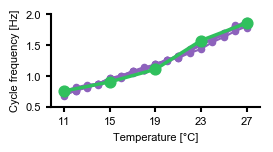

In [14]:
figsize = (2.7,1.2)
with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for ss in all_ss_reshape[:-5]:
        all_cycles = ss[:,0]
        all_freqs = 1/all_cycles*1000
        ax.plot(temp_vec-272, all_freqs, c=col['CONSISTENT1'])
        ax.scatter(temp_vec-272, all_freqs, color=col['CONSISTENT1'], marker='o', s=20.0)
    ax.plot(np.asarray([283,287,291,295,299])-272, all_exp_freqs, c=col['GT'], lw=2.5)
    ax.scatter(np.asarray([283,287,291,295,299])-272, all_exp_freqs, color=col['GT'], marker='o', s=60.0, zorder=100)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('Cycle frequency [Hz]')
    plt.xticks([11,15,19,23,27])
    plt.yticks([0.5,1.0,1.5,2.0])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(PANEL_X1, facecolor='None', transparent=True)
    plt.show()

# Panel B: Plot all phases of LP

In [170]:
all_experimLP_phases = np.asarray([summstats_experimental_11[13], summstats_experimental_15[13], summstats_experimental_19[13], summstats_experimental_23[13], summstats_experimental_27[13]])

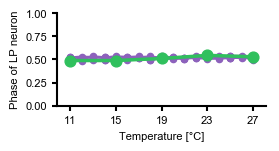

In [177]:
with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for ss in all_ss_reshape[:-5]:
        all_LP_phases = ss[:,13]
        ax.plot(temp_vec-272, all_LP_phases, c=col['CONSISTENT1'])
        ax.scatter(temp_vec-272, all_LP_phases, color=col['CONSISTENT1'], marker='o', s=20.0)
    ax.plot(np.asarray([283,287,291,295,299])-272, all_experimLP_phases, c=col['GT'], lw=2.5)
    ax.scatter(np.asarray([283,287,291,295,299])-272, all_experimLP_phases, color=col['GT'], marker='o', s=60.0, zorder=100)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('Phase of LP neuron')
    ax.set_ylim(0,1)
    plt.xticks([11,15,19,23,27])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(PANEL_X2, facecolor='None', transparent=True)
    plt.show()

# Panel C: Plot all phases of LP

In [172]:
all_experimPY_phases = np.asarray([summstats_experimental_11[14], summstats_experimental_15[14], summstats_experimental_19[14], summstats_experimental_23[14], summstats_experimental_27[14]])

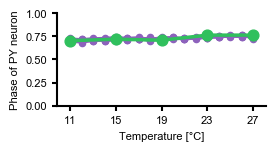

In [178]:
with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for ss in all_ss_reshape[:-5]:
        all_LP_phases = ss[:,14]
        ax.plot(temp_vec-272, all_LP_phases, c=col['CONSISTENT1'])
        ax.scatter(temp_vec-272, all_LP_phases, color=col['CONSISTENT1'], marker='o', s=20.0)
    ax.plot(np.asarray([283,287,291,295,299])-272, all_experimPY_phases, c=col['GT'], lw=2.5)
    ax.scatter(np.asarray([283,287,291,295,299])-272, all_experimPY_phases, color=col['GT'], marker='o', s=60.0, zorder=100)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('Phase of PY neuron')
    ax.set_ylim(0,1)
    plt.xticks([11,15,19,23,27])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(PANEL_X3, facecolor='None', transparent=True)
    plt.show()

# Assemble figure

In [162]:
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [168]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#D73789'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

plot_panelA = True
plot_panelB = True
plot_panelC = False
plot_panelD = True
plot_panelE = True

f = Figure('20.3cm', '4.3cm',

    Panel(
          SVG(PANEL_X1).scale(svg_scale).move(0, 15*factor_svg),
    ).move(0*factor_svg, -14.5*factor_svg),

    Panel(
          SVG(PANEL_X2).scale(svg_scale).move(0, 15*factor_svg),
    ).move(48*factor_svg, -14.5*factor_svg),

    Panel(
          SVG(PANEL_X3).scale(svg_scale).move(0, 15*factor_svg),
    ).move(96*factor_svg, -14.5*factor_svg),

    
)

!mkdir -p fig
f.save("fig/fig6.svg")
svg('fig/fig6.svg')